Mão na massa

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import missingno as msno

In [3]:
casas=pd.read_csv('realtor-data.zip.csv')
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [4]:
casas.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
casas.prev_sold_date=casas.prev_sold_date.str.replace("3019","2019")
casas.prev_sold_date=pd.to_datetime(casas.prev_sold_date)
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   brokered_by     float64       
 1   status          object        
 2   price           float64       
 3   bed             float64       
 4   bath            float64       
 5   acre_lot        float64       
 6   street          float64       
 7   city            object        
 8   state           object        
 9   zip_code        float64       
 10  house_size      float64       
 11  prev_sold_date  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 203.8+ MB


<Axes: >

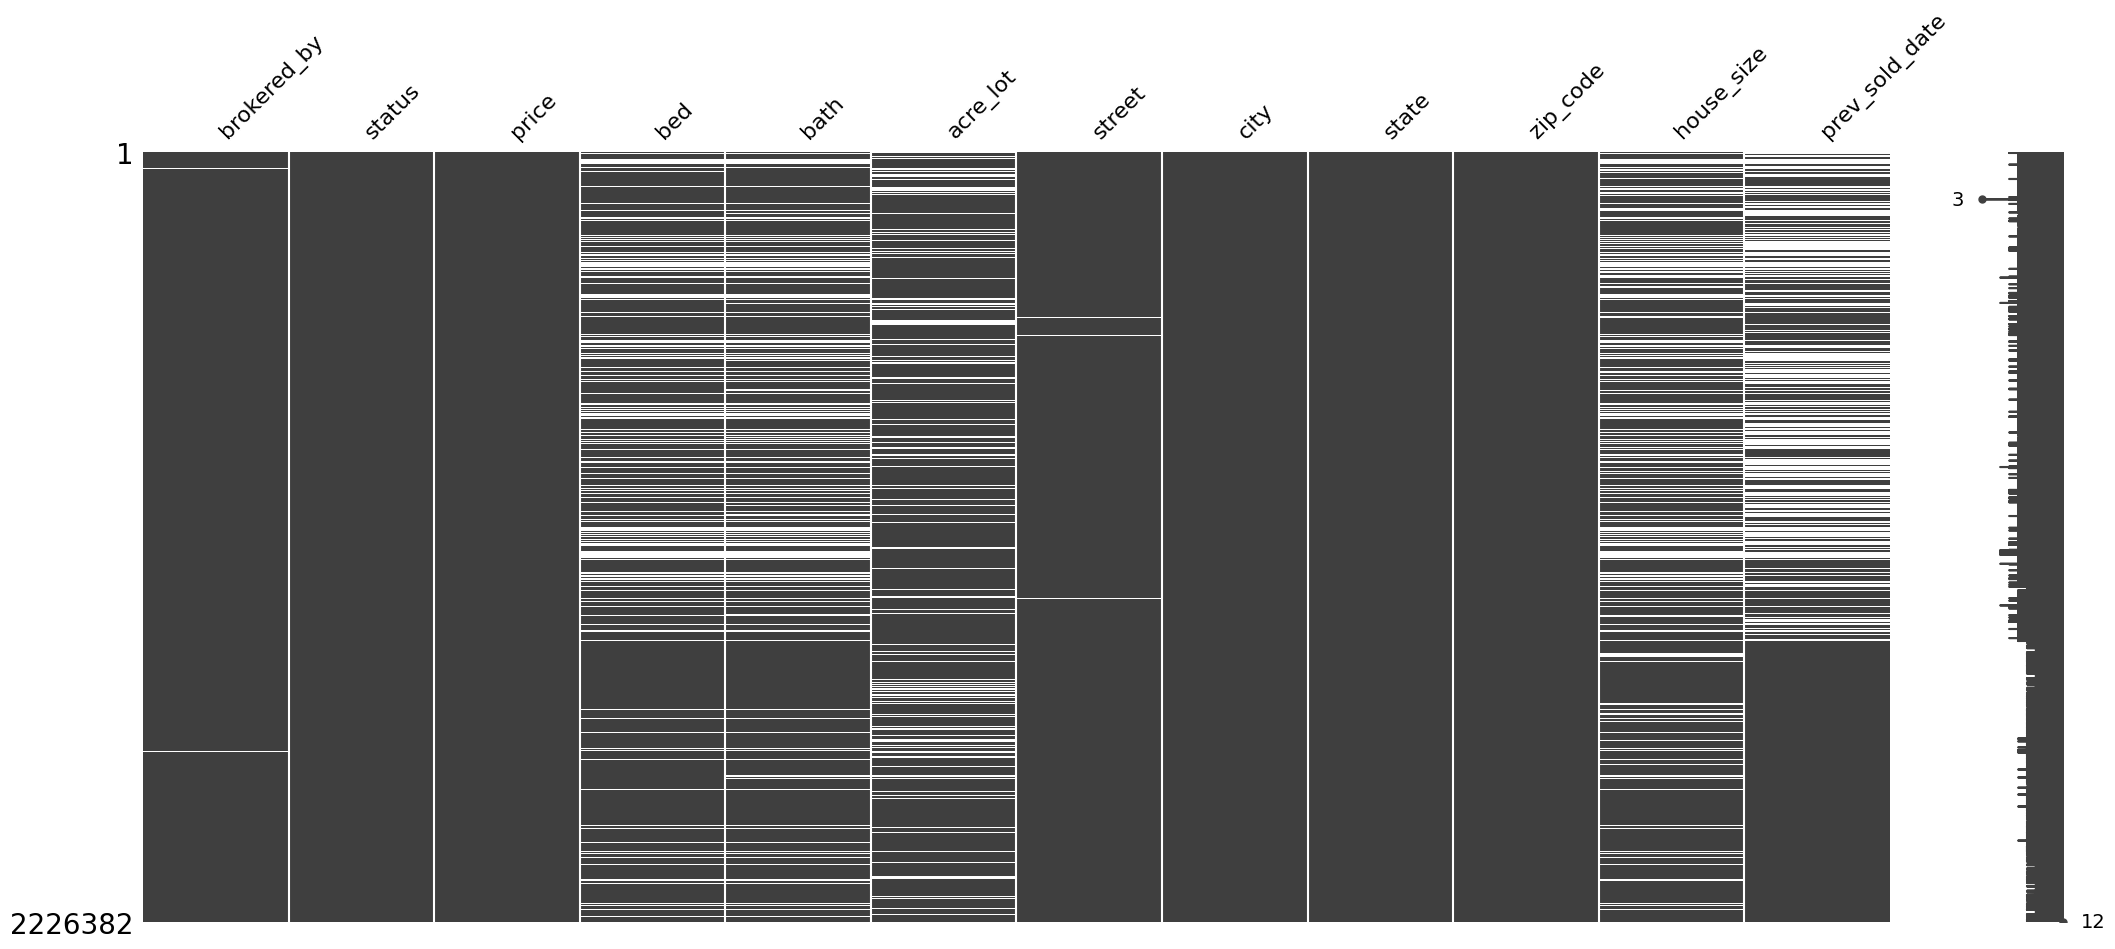

In [12]:
msno.matrix(casas)

In [13]:
casas[(casas.status.isna())|(casas.city.isna())|(casas.state.isna())]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2523,12390.0,for_sale,25000.0,NaN,NaN,0.25,1808243.0,NaN,Virgin Islands,NaN,NaN,NaT
2526,22968.0,for_sale,90000.0,NaN,NaN,1.19,653534.0,NaN,Virgin Islands,NaN,NaN,NaT
2527,22968.0,for_sale,120000.0,NaN,NaN,0.50,1670693.0,NaN,Virgin Islands,NaN,NaN,NaT
2561,22968.0,for_sale,649000.0,NaN,NaN,1.83,1191967.0,NaN,Virgin Islands,NaN,NaN,NaT
2606,22968.0,for_sale,55000.0,NaN,NaN,0.39,574081.0,NaN,Virgin Islands,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2153030,64679.0,sold,850000.0,NaN,NaN,680.25,1287108.0,NaN,California,95043.0,NaN,2021-11-09
2161633,15620.0,sold,175000.0,NaN,NaN,107.50,693900.0,NaN,California,95469.0,NaN,2022-04-12
2174261,90673.0,sold,720000.0,3.0,2.0,NaN,268703.0,NaN,Nevada,89449.0,1387.0,2021-12-13
2176406,33730.0,sold,19191.0,NaN,NaN,1.51,480807.0,NaN,California,96021.0,NaN,2022-04-15


In [10]:
#exercício 1.1
casas_tipo=pd.DataFrame(casas.dtypes).reset_index()

casas_limpo=casas.dropna(subset=list(casas_tipo[casas_tipo.iloc[:,1]=='object']['index']))
casas_limpo

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaT
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


In [16]:
casas_limpo[(casas_limpo.status.isna())|(casas_limpo.city.isna())|(casas_limpo.state.isna())]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date


In [ ]:
msno.matrix(casas_limpo)

In [17]:
#exercício 1.2
casas_limpo.bed=casas_limpo.bed.fillna(0)
casas_limpo.bath=casas_limpo.bath.fillna(0)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14620\2681353780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas_limpo.bed=casas_limpo.bed.fillna(0)
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14620\2681353780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas_limpo.bath=casas_limpo.bath.fillna(0)


In [20]:
#exercício 1.3
casas_limpo.house_size=casas_limpo.house_size.fillna(np.median(casas_limpo[~casas_limpo.house_size.isna()].house_size))
casas_limpo.house_size.value_counts(dropna=False)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14620\2938351218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas_limpo.house_size=casas_limpo.house_size.fillna(np.median(casas_limpo[~casas_limpo.house_size.isna()].house_size))


house_size
1760.0     569266
1200.0       8936
1500.0       6316
1800.0       6265
1400.0       6106
            ...  
13727.0         1
11721.0         1
16768.0         1
9861.0          1
19680.0         1
Name: count, Length: 12060, dtype: int64

<Axes: >

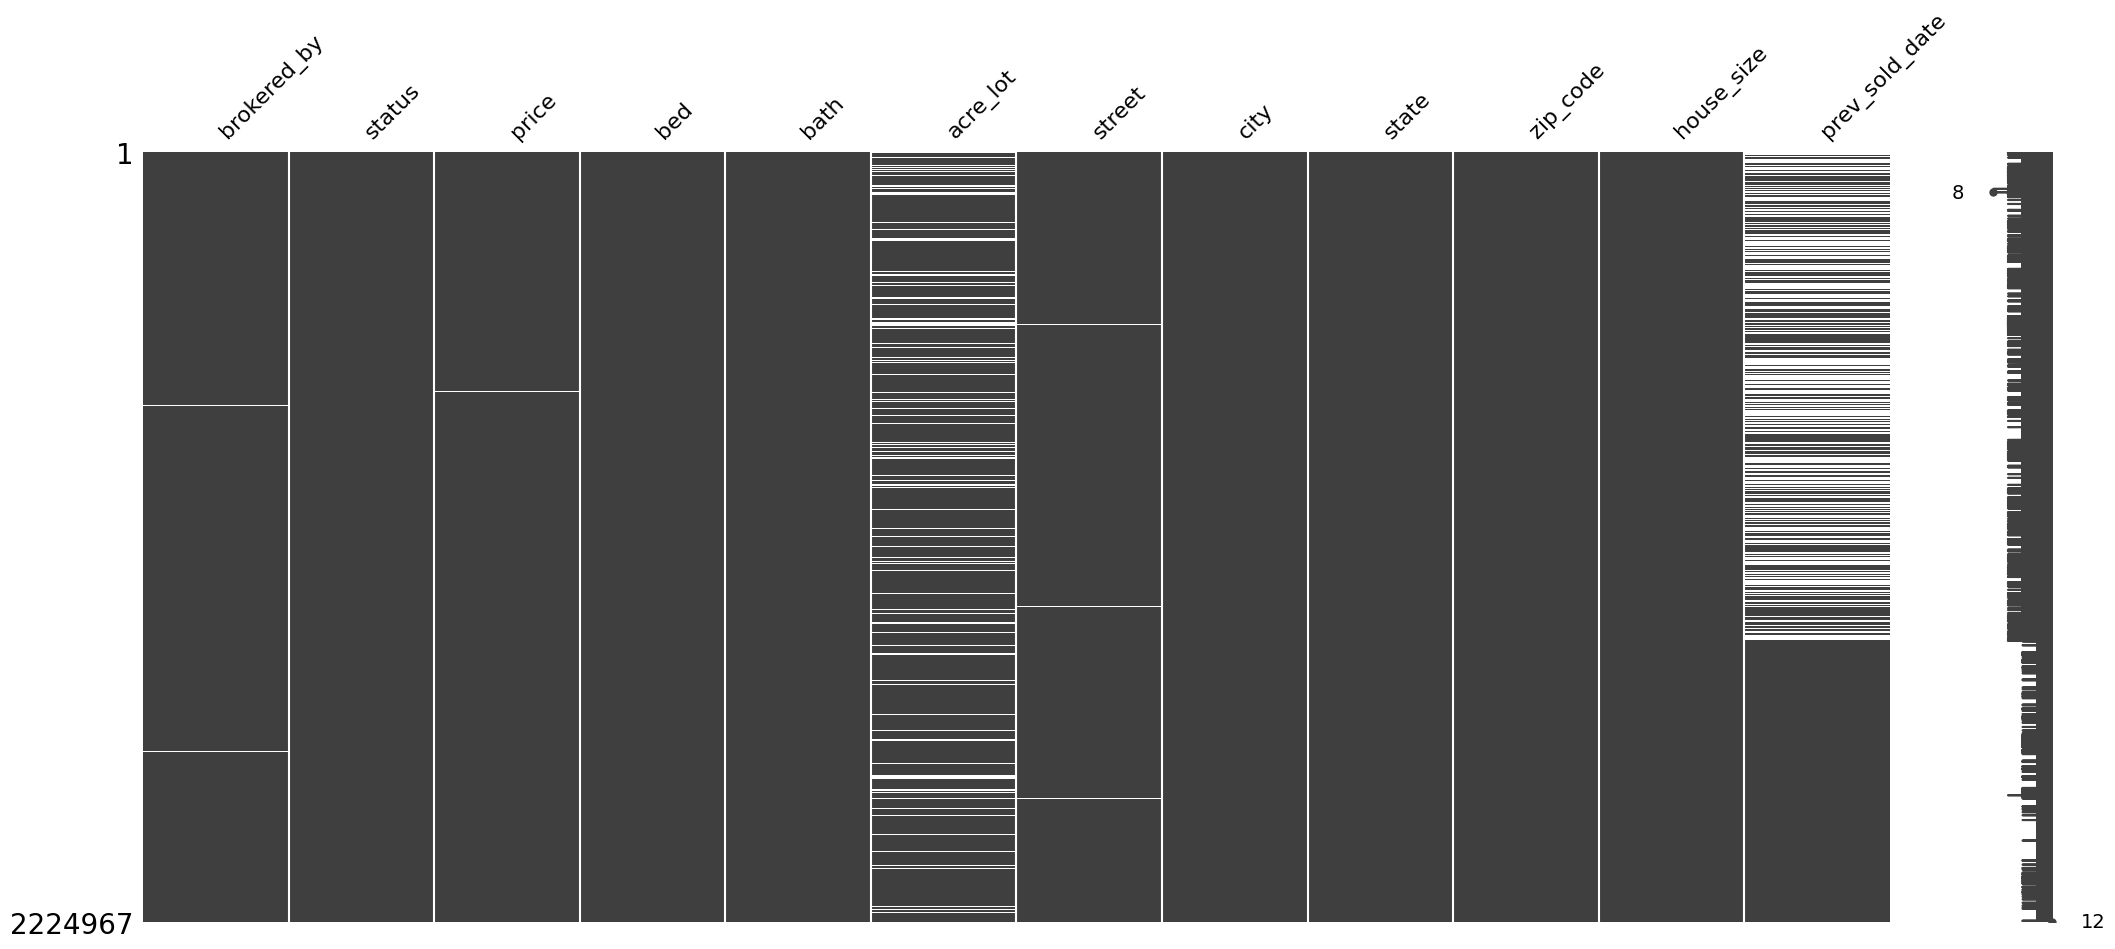

In [21]:
msno.matrix(casas_limpo)

In [22]:
#exercício 2
casas_limpo['data_prev_ano']=casas_limpo.prev_sold_date.dt.year
pd.pivot_table(casas_limpo, index='state', columns='data_prev_ano', values='price', aggfunc='sum')

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_14620\2868796478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casas_limpo['data_prev_ano']=casas_limpo.prev_sold_date.dt.year


data_prev_ano,1901.0,1904.0,1905.0,1906.0,1909.0,1910.0,1926.0,1928.0,1935.0,1939.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,2024.0,2026.0
state,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.577535e+08,1.879786e+08,2.283331e+08,2.492664e+08,2.583852e+08,1.058437e+09,1.182149e+09,NaN,NaN,NaN
Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.277950e+07,1.033030e+07,1.951011e+07,1.638910e+07,1.127095e+07,9.253900e+06,1.656500e+06,NaN,NaN,NaN
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.802036e+08,7.437501e+08,8.381857e+08,1.026771e+09,1.268011e+09,4.225249e+09,1.379100e+10,NaN,NaN,NaN
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241199e+08,1.203224e+08,1.588960e+08,1.747626e+08,1.993990e+08,6.862868e+08,1.070600e+09,15850.0,46000.0,NaN
California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.113502e+09,4.677060e+09,5.461445e+09,4.606512e+09,3.660026e+09,3.752772e+10,9.221602e+10,25001933.0,NaN,NaN
Colorado,NaN,NaN,NaN,345000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.554467e+08,7.897739e+08,9.680489e+08,1.000312e+09,1.022949e+09,2.105935e+09,2.118618e+09,NaN,NaN,NaN
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.152843e+08,2.210716e+08,2.190968e+08,2.355868e+08,2.521178e+08,3.936322e+08,4.190233e+07,NaN,NaN,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.580708e+07,6.219597e+07,6.826105e+07,7.722792e+07,6.627174e+07,6.031969e+08,7.064271e+08,NaN,NaN,NaN
District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.993221e+07,1.303109e+08,1.205149e+08,1.450583e+08,8.964862e+07,1.106188e+09,2.186004e+09,NaN,NaN,NaN
